In [14]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('./inputs/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./inputs/sample_submission.csv
./inputs/test.csv
./inputs/train.csv
./inputs/training_extra.csv


In [15]:
training_extra = pd.read_csv("./inputs/training_extra.csv")
training_extra

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,500000,Under Armour,Canvas,Small,10.0,Yes,Yes,Tote,Blue,23.882052,114.11068
1,500001,Puma,Polyester,Small,4.0,No,Yes,Backpack,Green,11.869095,129.74972
2,500002,Jansport,Polyester,Small,8.0,Yes,Yes,Tote,Red,8.092302,21.37370
3,500003,Nike,Nylon,Large,7.0,No,No,Messenger,Pink,7.719581,48.09209
4,500004,Nike,Leather,Large,9.0,No,Yes,Tote,Green,22.741826,77.32461
...,...,...,...,...,...,...,...,...,...,...,...
3694313,4194313,Nike,Canvas,NaN,3.0,Yes,Yes,Messenger,Blue,28.098120,104.74460
3694314,4194314,Puma,Leather,Small,10.0,Yes,Yes,Tote,Blue,17.379531,122.39043
3694315,4194315,Jansport,Canvas,Large,10.0,No,No,Backpack,Red,17.037708,148.18470
3694316,4194316,Puma,Canvas,NaN,2.0,No,No,Backpack,Gray,28.783339,22.32269


In [8]:
for i in training_extra:
    if i not in ["id", "Compartments", "Weight Capacity (kg)", "Price"]:
        print(training_extra[i].unique())
        print(len(training_extra[i].unique()) - 1)

['Under Armour' 'Puma' 'Jansport' 'Nike' 'Adidas' nan]
5
['Canvas' 'Polyester' 'Nylon' 'Leather' nan]
4
['Small' 'Large' 'Medium' nan]
3
['Yes' 'No' nan]
2
['Yes' 'No' nan]
2
['Tote' 'Backpack' 'Messenger' nan]
3
['Blue' 'Green' 'Red' 'Pink' nan 'Gray' 'Black']
6


In [4]:
training_extra.columns

Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')

In [10]:
# Filtering out all the missing values in the dataset starting with the brand > material > style
for i in training_extra:
    training_extra = training_extra[training_extra[i].notnull()]

no_missing = training_extra
no_missing

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,500000,Under Armour,Canvas,Small,10.0,Yes,Yes,Tote,Blue,23.882052,114.11068
1,500001,Puma,Polyester,Small,4.0,No,Yes,Backpack,Green,11.869095,129.74972
2,500002,Jansport,Polyester,Small,8.0,Yes,Yes,Tote,Red,8.092302,21.37370
3,500003,Nike,Nylon,Large,7.0,No,No,Messenger,Pink,7.719581,48.09209
4,500004,Nike,Leather,Large,9.0,No,Yes,Tote,Green,22.741826,77.32461
...,...,...,...,...,...,...,...,...,...,...,...
3694311,4194311,Puma,Polyester,Medium,4.0,Yes,Yes,Messenger,Pink,28.425845,107.18468
3694312,4194312,Jansport,Polyester,Large,6.0,Yes,Yes,Backpack,Red,16.641739,31.52978
3694314,4194314,Puma,Leather,Small,10.0,Yes,Yes,Tote,Blue,17.379531,122.39043
3694315,4194315,Jansport,Canvas,Large,10.0,No,No,Backpack,Red,17.037708,148.18470


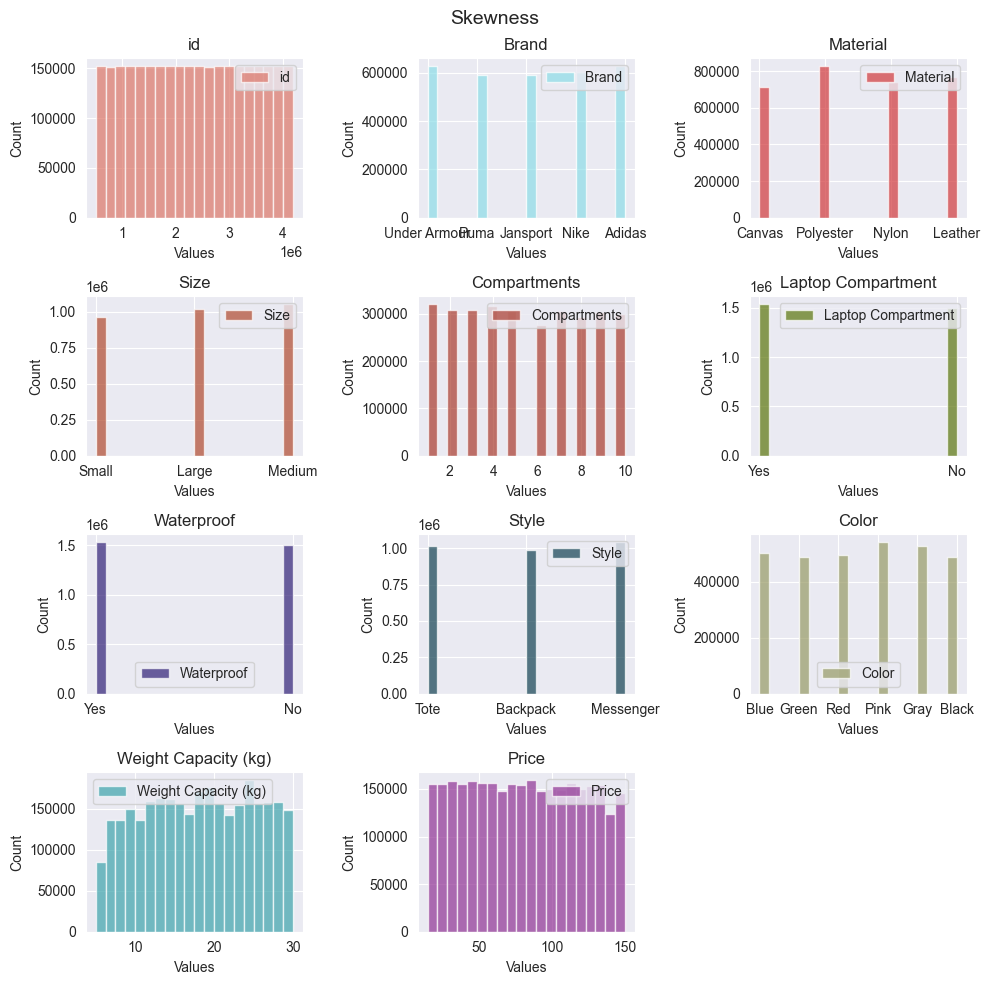

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

num_cols = len(training_extra.columns)  # Get number of columns
rows = (num_cols + 2) // 3  # Adjust rows dynamically

for i, (name, data) in enumerate(training_extra.items(), 1):
    plt.subplot(rows, 3, i)  # Adjust rows instead of fixing at 1 row
    plt.hist(data, bins=20, alpha=0.7, label=name, color=np.random.rand(3, ))
    plt.title(name)
    plt.xlabel("Values")  # Avoid using `data` as xlabel
    plt.ylabel("Count")
    plt.legend()

plt.suptitle("Skewness", fontsize=14)
plt.tight_layout()
plt.show()

In [12]:
no_missing.to_csv("./modified_inputs/no_missing_training_extra.csv", index=False)